In [12]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import seaborn as sb

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<Axes: xlabel='result', ylabel='Count'>

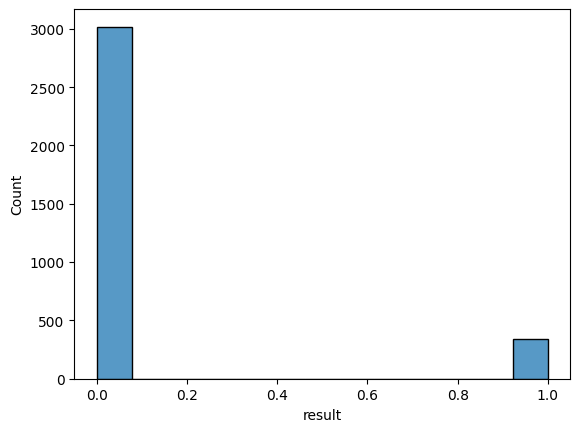

In [14]:
df = pd.read_csv("/home/chbricout/Master/brainscore/export-CBIC.csv", index_col=0)
sb.histplot(df, x="result")

<Axes: xlabel='result', ylabel='Count'>

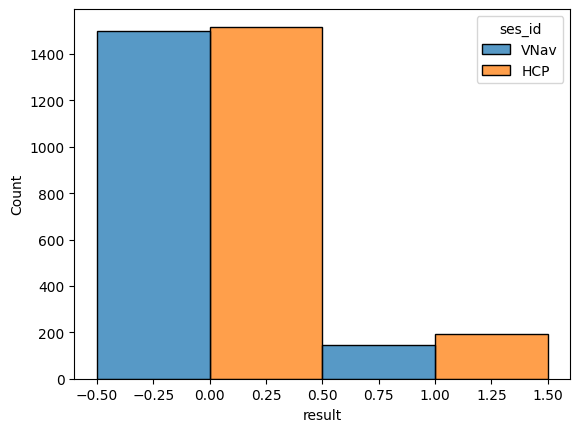

In [15]:
sb.histplot(df, x="result", hue="ses_id", discrete=True, multiple="dodge")

In [16]:
duplicate_df = df[df["result"] == 1].groupby("sub_id").count()
len(df[df["result"] == 1]) - len(duplicate_df)

71

In [19]:
good_df = df[df["result"] == 1]
clinica_sub = good_df.rename(
    columns={"sub_id": "participant_id", "ses_id": "session_id"}
)
clinica_sub[["participant_id", "session_id"]].to_csv("clinica_cbic.tsv", sep="\t")

In [2]:
from src.process.generate.generate import (
    CreateSynthVolume,
    Preprocess,
    RandomScaleIntensityd,
)
import matplotlib.pyplot as plt

/home/chbricout/Master/cortical-motion/.conda/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
synthetic_tsf = CreateSynthVolume()
load = Preprocess()
final = RandomScaleIntensityd(keys="data", minv=0, max_range=(0.95, 1.05))

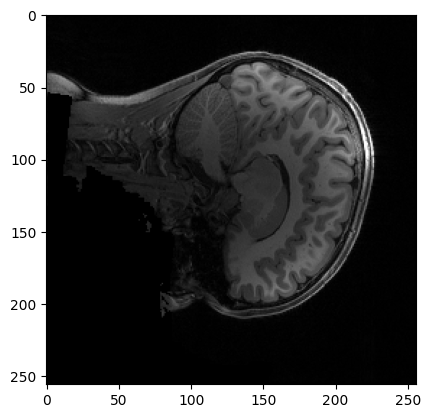

In [4]:
to_prcs = {
    "data": "/run/media/chbricout/E7DC-E5A9/Site-CUNY/sub-NDARCW058DP8/ses-VNav/anat/sub-NDARCW058DP8_ses-VNav_T1w.nii.gz"
}
vol = load(to_prcs)
plt.imshow(vol["data"][0, 100, :], cmap="gray")

In [7]:
synth_vol = synthetic_tsf(vol)
synth_vol["motion_mm"]

0.652088133543869

In [10]:
from monai.transforms import SaveImage

save = SaveImage(
    savepath_in_metadict=True,
    resample=True,
    separate_folder=False,
    print_log=False,
)
save(final(synth_vol)["data"])
synth_vol["motion_mm"]
save(final(synth_vol)["clear"])

tensor([[[[ 5.0313e-03,  4.9782e-03,  4.3575e-03,  ...,  2.7985e-03,
            1.0792e-03,  5.0449e-05],
          [ 1.0272e-02,  5.3737e-03,  9.2787e-03,  ...,  2.0574e-03,
            1.9405e-03,  1.1643e-04],
          [ 3.8037e-03,  3.7007e-03,  7.7494e-03,  ...,  4.0731e-03,
            1.4128e-03,  7.2590e-05],
          ...,
          [ 5.8539e-03,  8.8237e-03,  3.5037e-03,  ...,  7.6504e-03,
            4.6283e-03,  1.8171e-05],
          [ 8.7366e-04,  7.5045e-03,  3.1665e-03,  ...,  1.1077e-02,
            5.4250e-03,  1.7046e-05],
          [-1.1888e-06,  1.3485e-04,  5.3351e-05,  ...,  1.2531e-04,
            6.8680e-05,  2.1365e-07]],

         [[ 4.1557e-03,  3.0989e-03,  3.0213e-03,  ...,  3.2200e-03,
            2.9237e-03,  1.7483e-04],
          [ 9.2464e-03,  7.9936e-03,  3.6738e-03,  ...,  3.8531e-03,
            4.7117e-03,  3.0982e-04],
          [ 6.1862e-03,  4.8398e-03,  9.9788e-03,  ...,  9.4261e-03,
            1.8145e-03,  5.1868e-05],
          ...,
     